
### BFS and DFS on Trees and Graphs
In this notebook, we will implement Breadth-First Search (BFS) and Depth-First Search (DFS) on a tree and a graph.


Tree BFS and DFS Code:

In [2]:
# Tree (Using Dictionary)
tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

# DFS for Tree
def dfs_tree(node, visited=set()):
    if node not in visited:
        print(node, end=' ')
        visited.add(node)
        for child in tree[node]:
            dfs_tree(child, visited)

print("DFS on Tree:")
dfs_tree('A')


DFS on Tree:
A B D E C F 

Tree BFS Code:

In [3]:
from collections import deque

# BFS for Tree
def bfs_tree(start):
    visited = set()
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=' ')
            visited.add(node)
            queue.extend(tree[node])

print("\nBFS on Tree:")
bfs_tree('A')



BFS on Tree:
A B C D E F 

Graph DFS Code:

In [4]:
# Graph (can have cycles)
graph = {
    '1': ['2', '3'],
    '2': ['1', '4'],
    '3': ['1', '4'],
    '4': ['2', '3']
}

# DFS for Graph
def dfs_graph(node, visited=set()):
    if node not in visited:
        print(node, end=' ')
        visited.add(node)
        for neighbor in graph[node]:
            dfs_graph(neighbor, visited)

print("DFS on Graph:")
dfs_graph('1')


DFS on Graph:
1 2 4 3 

Graph BFS Code

In [5]:
# BFS for Graph
def bfs_graph(start):
    visited = set()
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=' ')
            visited.add(node)
            queue.extend(graph[node])

print("\nBFS on Graph:")
bfs_graph('1')



BFS on Graph:
1 2 3 4 

# task 2

<Figure size 1000x600 with 0 Axes>

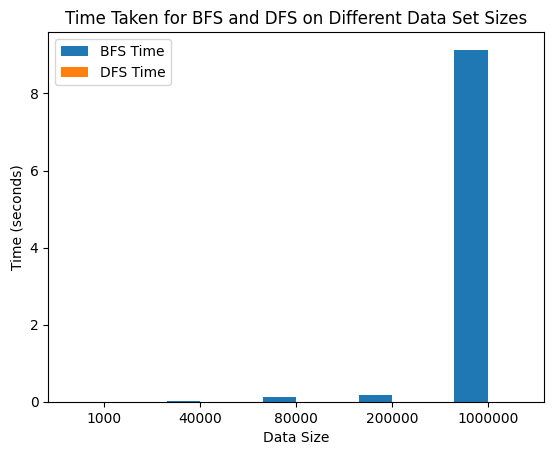

      Size  BFS Time  DFS Time
0     1000  0.000313  0.000005
1    40000  0.014983  0.000011
2    80000  0.111559  0.000020
3   200000  0.173747  0.000029
4  1000000  9.134624  0.000024


In [14]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate a random list of numbers for each range
def generate_random_list(size):
    return random.sample(range(1, size * 10), size)

# Binary Search Tree Node
class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.value = key

# Function to insert nodes into the Binary Search Tree
def insert(root, key):
    if root is None:
        return TreeNode(key)
    else:
        if key < root.value:
            root.left = insert(root.left, key)
        else:
            root.right = insert(root.right, key)
    return root

# Function to perform Depth First Search (DFS)
def dfs(root, goal):
    if root is None:
        return None
    if root.value == goal:
        return root
    elif goal < root.value:
        return dfs(root.left, goal)
    else:
        return dfs(root.right, goal)

# Function to perform Breadth First Search (BFS)
def bfs(root, goal):
    if root is None:
        return None
    queue = [root]
    while queue:
        node = queue.pop(0)
        if node.value == goal:
            return node
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
    return None

# Define the sizes for each set
sizes = [1000, 40000, 80000, 200000, 1000000]

# DataFrame to store results
results = []

# Generate the data and trees for each size
for size in sizes:
    # Generate the list of random numbers
    random_list = generate_random_list(size)

    # Create the tree by inserting each element into the BST
    root = None
    for num in random_list:
        root = insert(root, num)

    # Define the goal as the element at total_len - 220
    goal = random_list[size - 220]

    # Perform BFS and measure time taken
    start_time = time.time()
    bfs_result = bfs(root, goal)
    bfs_time = time.time() - start_time

    # Perform DFS and measure time taken
    start_time = time.time()
    dfs_result = dfs(root, goal)
    dfs_time = time.time() - start_time

    # Store the results for this set
    results.append({
        "Size": size,
        "BFS Time": bfs_time,
        "DFS Time": dfs_time
    })

# Create a DataFrame from the results
df = pd.DataFrame(results)

# Plotting the bar chart
plt.figure(figsize=(10,6))
bar_width = 0.35
index = range(len(sizes))

fig, ax = plt.subplots()
bar_bfs = ax.bar(index, df['BFS Time'], bar_width, label='BFS Time')
bar_dfs = ax.bar([i + bar_width for i in index], df['DFS Time'], bar_width, label='DFS Time')

ax.set_xlabel('Data Size')
ax.set_ylabel('Time (seconds)')
ax.set_title('Time Taken for BFS and DFS on Different Data Set Sizes')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(sizes)
ax.legend()

plt.show()

# Print the results DataFrame
print(df)




# task 3

In [19]:
from collections import deque

# Define the graph using an adjacency list
graph = {
    "Islamabad": ["Rawalpindi", "Lahore", "Peshawar"],
    "Rawalpindi": ["Islamabad", "Peshawar", "Quetta"],
    "Peshawar": ["Islamabad", "Rawalpindi", "Quetta"],
    "Lahore": ["Islamabad", "Multan", "Quetta"],
    "Multan": ["Lahore", "Karachi", "Quetta"],
    "Quetta": ["Rawalpindi", "Peshawar", "Multan", "Karachi"],
    "Karachi": ["Multan", "Quetta"]
}

# BFS Function to find the shortest path
def bfs_shortest_path(graph, start, goal):
    # Queue to keep track of the current path
    queue = deque([(start, [start])])  # Each element is a tuple (city, path)

    # Set to keep track of visited cities
    visited = set([start])

    while queue:
        # Pop the city and path from the front of the queue
        current_city, path = queue.popleft()

        # If the goal city is reached, return the path
        if current_city == goal:
            return path

        # Visit each connected city
        for neighbor in graph[current_city]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))  # Append the new path

    return None  # If there's no path found

# Finding the shortest path from Islamabad to Karachi
start_city = "Islamabad"
goal_city = "Karachi"
shortest_path = bfs_shortest_path(graph, start_city, goal_city)

# Output the result
if shortest_path:
    print("Shortest path from", start_city, "to", goal_city, ":", " -> ".join(shortest_path))
else:
    print("No path found from", start_city, "to", goal_city)


Shortest path from Islamabad to Karachi : Islamabad -> Rawalpindi -> Quetta -> Karachi
